In [508]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
brands=pd.read_csv("/eniac-clean-data/tables/brands_clean.csv")
orderlines=pd.read_csv("/eniac-clean-data/tables/orderlines_clean.csv")
orders=pd.read_csv("/eniac-clean-data/tables/orders_clean.csv")
products=pd.read_csv("/eniac-clean-data/tables/products_clean.csv")
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

In [509]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10580 entries, 0 to 10579
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10580 non-null  int64  
 1   sku          10580 non-null  object 
 2   name         10580 non-null  object 
 3   desc         10573 non-null  object 
 4   price        10534 non-null  float64
 5   promo_price  10580 non-null  float64
 6   in_stock     10580 non-null  int64  
 7   type         10530 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 661.4+ KB


In [510]:
products_categories=products.copy()

In [511]:
products_categories["category"]=""

In [512]:
products_categories.loc[
    (products_categories["desc"].str.contains("laptop", case=False, na=False)) |
    (products_categories["desc"].str.contains("notebook", case=False, na=False)) |
    (products_categories["desc"].str.contains("computer", case=False, na=False)) |
    (products_categories["desc"].str.contains("PC", case=False, na=False)) |
    (products_categories["desc"].str.contains("MacBook", case=False, na=False)) |
    (products_categories["desc"].str.contains("IMAC", case=False, na=False)) |
    (products_categories["desc"].str.contains("IMac", case=False, na=False)) |
    (products_categories["desc"].str.contains("Chromebook", case=False, na=False)) |
    (products_categories["desc"].str.contains("refurbished MacBook", case=False, na=False)) |
    (products_categories["desc"].str.contains("MacBook Pro refurbished", case=False, na=False)) |
    (products_categories["desc"].str.contains("refurbished copmuter", case=False, na=False)) |
    (products_categories["desc"].str.contains("Mac", case=False, na=False)),
    "category"
] = "Laptops and Computers"


In [513]:
products_categories.loc[
    (products_categories["desc"].str.contains("apple", case=False, na=False)) |
    (products_categories["desc"].str.contains("iphone", case=False, na=False)) |
    (products_categories["desc"].str.contains("smartphone", case=False, na=False)),
    "category"
] = "Smartphone"

In [514]:
products_categories.loc[
    (products_categories["desc"].str.contains("camers", case=False, na=False)) |
    (products_categories["desc"].str.contains("photography", case=False, na=False)) |
    (products_categories["desc"].str.contains("lens", case=False, na=False))|
    (products_categories["desc"].str.contains("Canon", case=False, na=False)) |
    (products_categories["desc"].str.contains("Nikon", case=False, na=False)) |
    (products_categories["desc"].str.contains("DSLR", case=False, na=False)) |
    (products_categories["desc"].str.contains("video camera", case=False, na=False))|
    (products_categories["desc"].str.contains("photo editing", case=False, na=False))|
    (products_categories["desc"].str.contains("lighting", case=False, na=False))|
    (products_categories["desc"].str.contains("video recording", case=False, na=False))|
    (products_categories["desc"].str.contains("tripod", case=False, na=False)),
    "category"
] = "Cameras and Photography"

In [515]:
products_categories.loc[
    (products_categories["desc"].str.contains("headphones", case=False, na=False)) |
    (products_categories["desc"].str.contains("earbuds", case=False, na=False)) |
    (products_categories["desc"].str.contains("speakers", case=False, na=False))|
    (products_categories["desc"].str.contains("audio", case=False, na=False)) |
    (products_categories["desc"].str.contains("sound systems", case=False, na=False))|
     (products_categories["desc"].str.contains("microphone", case=False, na=False)),
    "category"
] = "Audio and Sound Equipment"

In [516]:
products_categories.loc[
    (products_categories["desc"].str.contains("television", case=False, na=False)) |
    (products_categories["desc"].str.contains("smart TV", case=False, na=False)) |
    (products_categories["desc"].str.contains("TV", case=False, na=False))|
    (products_categories["desc"].str.contains("router", case=False, na=False)) |
    (products_categories["desc"].str.contains("televizion", case=False, na=False)) |
    (products_categories["desc"].str.contains("DVD", case=False, na=False)) |
    (products_categories["desc"].str.contains("burner", case=False, na=False)) |
    (products_categories["desc"].str.contains("NAS server", case=False, na=False)) |
    (products_categories["desc"].str.contains("server", case=False, na=False)) |
    (products_categories["desc"].str.contains("music system", case=False, na=False)) | 
    (products_categories["desc"].str.contains("electric scooter", case=False, na=False)) |
    (products_categories["desc"].str.contains("electric", case=False, na=False)) |
    (products_categories["desc"].str.contains("Cockpitglasses", case=False, na=False)) |
    (products_categories["desc"].str.contains("glasses", case=False, na=False))|
    (products_categories["desc"].str.contains("external battery", case=False, na=False)),

    "category"
] = "Electronics"

In [517]:
products_categories.loc[
    (products_categories["desc"].str.contains("gaming", case=False, na=False)) |
    (products_categories["desc"].str.contains("PlayStation", case=False, na=False)) |
    (products_categories["desc"].str.contains("Nintendo", case=False, na=False))|
    (products_categories["desc"].str.contains("Xbox", case=False, na=False)) |
    (products_categories["desc"].str.contains("console", case=False, na=False))|
    (products_categories["desc"].str.contains("video game", case=False, na=False)),
    "category"
] = "Gaming"

In [518]:
products_categories.loc[
    (products_categories["desc"].str.contains("phone case", case=False, na=False)) |
    (products_categories["desc"].str.contains("case", case=False, na=False)) |
    (products_categories["desc"].str.contains("charger", case=False, na=False))|
    (products_categories["desc"].str.contains("screen protector", case=False, na=False)) |
    (products_categories["desc"].str.contains("protector", case=False, na=False)),
    "category"
] = "Mobile Accessories"

In [519]:
products_categories.loc[
    (products_categories["desc"].str.contains("keyboard", case=False, na=False)) |
    (products_categories["desc"].str.contains("mouse", case=False, na=False)) |
    (products_categories["desc"].str.contains("monitor", case=False, na=False))|
    (products_categories["desc"].str.contains("USB", case=False, na=False)) |
    (products_categories["desc"].str.contains("hard drive", case=False, na=False)) |
    (products_categories["desc"].str.contains("external hard drive", case=False, na=False)) |
    (products_categories["desc"].str.contains("SSD", case=False, na=False)),
    "category"
] = "Computer Accessories"

In [520]:
products_categories.loc[
    (products_categories["desc"].str.contains("software", case=False, na=False)) |
    (products_categories["desc"].str.contains("Windows", case=False, na=False)) |
    (products_categories["desc"].str.contains("Office", case=False, na=False))|
    (products_categories["desc"].str.contains("antivirus", case=False, na=False)) |
    (products_categories["desc"].str.contains("download", case=False, na=False)) |
    (products_categories["desc"].str.contains("insall Program", case=False, na=False)),
    "category"
] = "Software"

In [521]:
products_categories.loc[
    (products_categories["desc"].str.contains("microwave", case=False, na=False)) |
    (products_categories["desc"].str.contains("oven", case=False, na=False)) |
    (products_categories["desc"].str.contains("vacuum", case=False, na=False))|
    (products_categories["desc"].str.contains("dishwasher", case=False, na=False)) |
    (products_categories["desc"].str.contains("kitchen sink", case=False, na=False))|
    (products_categories["desc"].str.contains("control temperature", case=False, na=False))|
    (products_categories["desc"].str.contains("lamp", case=False, na=False))|
    (products_categories["desc"].str.contains("Jump rope", case=False, na=False)),
    "category"
] = "Home Appliances"

In [522]:
products_categories.loc[
    (products_categories["desc"].str.contains("tablet", case=False, na=False)) |
    (products_categories["desc"].str.contains("iPad", case=False, na=False)) |
    (products_categories["desc"].str.contains("Galaxy Tab", case=False, na=False))|
    (products_categories["desc"].str.contains("Surface", case=False, na=False)) |
    (products_categories["desc"].str.contains("tablets", case=False, na=False)) |
    (products_categories["desc"].str.contains("iPad refurbished", case=False, na=False)),
    "category"
] = "Tablets"

In [523]:
products_categories.loc[
    (products_categories["desc"].str.contains("smartwatch", case=False, na=False)) |
    (products_categories["desc"].str.contains("FitBit", case=False, na=False)) |
    (products_categories["desc"].str.contains("Apple Watch", case=False, na=False))|
    (products_categories["desc"].str.contains("watch", case=False, na=False)) |
    (products_categories["desc"].str.contains("wearable", case=False, na=False)) |
    (products_categories["desc"].str.contains("electronic watch", case=False, na=False)),
    "category"
] = "Wearable Technology"

In [524]:
products_categories.loc[
    (products_categories["desc"].str.contains("iPhone cover", case=False, na=False)) |
    (products_categories["desc"].str.contains("phone cover", case=False, na=False)) |
    (products_categories["desc"].str.contains("protective cover", case=False, na=False))|
    (products_categories["desc"].str.contains("protective housing", case=False, na=False)) |
    (products_categories["desc"].str.contains("cover for iPhone", case=False, na=False)) |
    (products_categories["desc"].str.contains("Full Screen", case=False, na=False)) |
    (products_categories["desc"].str.contains("case for ", case=False, na=False)) |
    (products_categories["desc"].str.contains("Screen Saver", case=False, na=False)) |
    (products_categories["desc"].str.contains("Aluminum and leather for iPhone", case=False, na=False)),
    "category"
] = "Smartphone Accessories"

In [525]:
products_categories.loc[
    (products_categories["desc"].str.contains("computer bags", case=False, na=False)) |
    (products_categories["desc"].str.contains("computers bags", case=False, na=False)) |
    (products_categories["desc"].str.contains("Neoprene Sleeve", case=False, na=False))|
    (products_categories["desc"].str.contains("Neoprene Sleeve for MacBook", case=False, na=False)) |
    (products_categories["desc"].str.contains("water resistant bag", case=False, na=False)) |
    (products_categories["desc"].str.contains("case for ", case=False, na=False)),
    "category"
] = "Laptops and Computer Accessories"

In [526]:
products_categories.loc[
    (products_categories["desc"].str.contains("tablet accessories", case=False, na=False)) |
    (products_categories["desc"].str.contains("shoulder bag", case=False, na=False)) |
    (products_categories["desc"].str.contains("bad for iPad", case=False, na=False))|
    (products_categories["desc"].str.contains("Neoprene Sleeve for MacBook", case=False, na=False)) |
    (products_categories["desc"].str.contains("water resistant bag", case=False, na=False)) |
    (products_categories["desc"].str.contains("Screen Protector for iPad", case=False, na=False)),
    "category"
] = "Tablets Accessories"

In [527]:
products_categories.loc[
    (products_categories["desc"].str.contains("tools", case=False, na=False)) |
    (products_categories["desc"].str.contains("drill", case=False, na=False)) |
    (products_categories["desc"].str.contains("screwdriver", case=False, na=False))|
    (products_categories["desc"].str.contains("saw", case=False, na=False)) |
    (products_categories["desc"].str.contains("DIY", case=False, na=False)) |
    (products_categories["desc"].str.contains("home improvement", case=False, na=False)),
    "category"
] = "DIY and Tools"

In [528]:
products_categories.loc[
    (products_categories["desc"].str.contains("smart home", case=False, na=False)) |
    (products_categories["desc"].str.contains("security camera", case=False, na=False)) |
    (products_categories["desc"].str.contains("smart lock", case=False, na=False))|
    (products_categories["desc"].str.contains("termostat", case=False, na=False)),
    "category"
] = "Home Automation and Security"

In [529]:
products_categories.loc[
    (products_categories["desc"].str.contains("Disc replacement", case=False, na=False)) |
    (products_categories["desc"].str.contains("Repair service", case=False, na=False)) |
    (products_categories["desc"].str.contains("Rechargeable battery", case=False, na=False))|
    (products_categories["desc"].str.contains("replacement", case=False, na=False)),
    "category"
] = "Repair Service"

In [530]:
products_categories.loc[
    (products_categories["desc"].str.contains("Bracelet", case=False, na=False)) |
    (products_categories["desc"].str.contains("cover", case=False, na=False)) |
    (products_categories["desc"].str.contains("Bracelet", case=False, na=False))|
    (products_categories["desc"].str.contains("replacement", case=False, na=False)),
    "category"
] = "Other Accessories"

In [531]:
products_categories.loc[
    (products_categories["desc"].str.contains("bicycle", case=False, na=False)) |
    (products_categories["desc"].str.contains("fitness", case=False, na=False)) |
    (products_categories["desc"].str.contains("camping", case=False, na=False))|
    (products_categories["desc"].str.contains("outdoor", case=False, na=False))|
    (products_categories["desc"].str.contains("sports", case=False, na=False)),
    "category"
] = "Outdoor and Sports Equipment"

In [532]:
products_categories.loc[
    (products_categories["desc"].str.contains("bicycle", case=False, na=False)) |
    (products_categories["desc"].str.contains("fitness", case=False, na=False)) |
    (products_categories["desc"].str.contains("camping", case=False, na=False))|
    (products_categories["desc"].str.contains("outdoor", case=False, na=False))|
    (products_categories["desc"].str.contains("sports", case=False, na=False)),
    "category"
] = "Outdoor and Sports Equipment"

In [533]:
products_categories.category.value_counts()

category
Computer Accessories                2498
Laptops and Computers               1684
Tablets                             1367
Smartphone                           864
                                     709
Other Accessories                    704
Mobile Accessories                   681
Electronics                          559
Wearable Technology                  345
Laptops and Computer Accessories     280
DIY and Tools                        276
Repair Service                       230
Outdoor and Sports Equipment         131
Smartphone Accessories                62
Audio and Sound Equipment             51
Tablets Accessories                   48
Software                              34
Cameras and Photography               25
Home Appliances                       19
Home Automation and Security          13
Name: count, dtype: int64

In [534]:
products_categories['category'] = products_categories['category'].replace("", "Other")

In [535]:
products_categories.category.value_counts()

category
Computer Accessories                2498
Laptops and Computers               1684
Tablets                             1367
Smartphone                           864
Other                                709
Other Accessories                    704
Mobile Accessories                   681
Electronics                          559
Wearable Technology                  345
Laptops and Computer Accessories     280
DIY and Tools                        276
Repair Service                       230
Outdoor and Sports Equipment         131
Smartphone Accessories                62
Audio and Sound Equipment             51
Tablets Accessories                   48
Software                              34
Cameras and Photography               25
Home Appliances                       19
Home Automation and Security          13
Name: count, dtype: int64

In [536]:
products_count=products_categories.groupby("category").agg({"sku" : "count"})

In [537]:
products_count

,sku
category,
Audio and Sound Equipment,51
Cameras and Photography,25
Computer Accessories,2498
DIY and Tools,276
Electronics,559
Home Appliances,19
Home Automation and Security,13
Laptops and Computer Accessories,280
Laptops and Computers,1684


In [538]:
products_count=products_count.rename(columns={"sku" : "number of products"})

In [539]:
products_count

,number of products
category,
Audio and Sound Equipment,51
Cameras and Photography,25
Computer Accessories,2498
DIY and Tools,276
Electronics,559
Home Appliances,19
Home Automation and Security,13
Laptops and Computer Accessories,280
Laptops and Computers,1684


<Axes: xlabel='number of products', ylabel='category'>

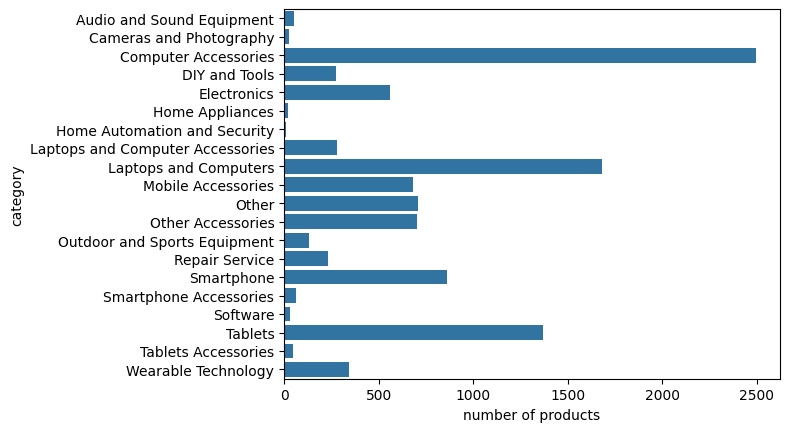

In [540]:
sns.barplot(data=products_count, x="number of products", y="category")

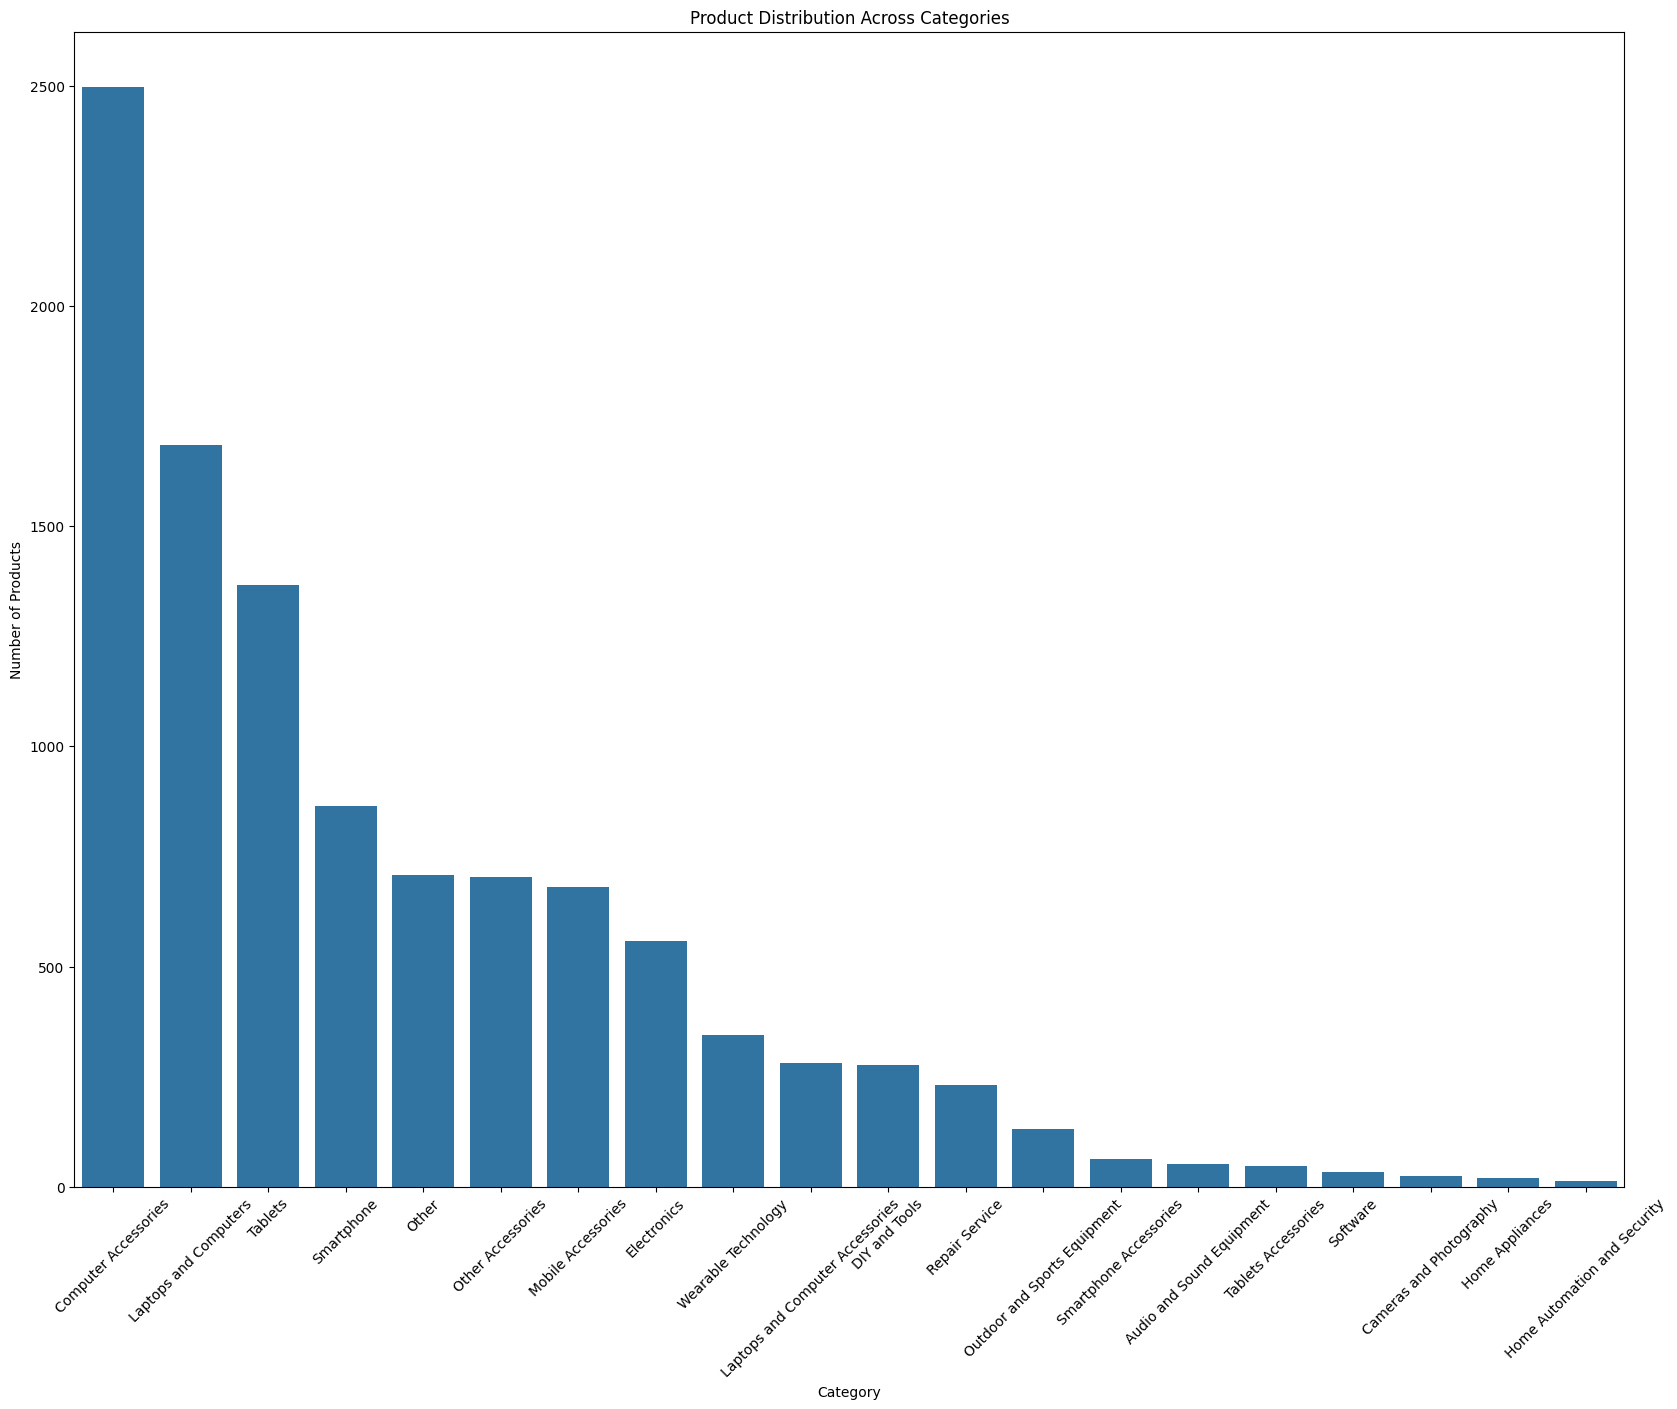

In [541]:

category_counts = products_categories['category'].value_counts()
plt.figure(figsize=(20, 15))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Product Distribution Across Categories')
plt.show()


In [542]:
products_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10580 entries, 0 to 10579
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10580 non-null  int64  
 1   sku          10580 non-null  object 
 2   name         10580 non-null  object 
 3   desc         10573 non-null  object 
 4   price        10534 non-null  float64
 5   promo_price  10580 non-null  float64
 6   in_stock     10580 non-null  int64  
 7   type         10530 non-null  object 
 8   category     10580 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 744.0+ KB


In [543]:
orderlines_mod=orderlines.copy()

In [544]:
orderlines_mod

,Unnamed: 0,id,id_order,product_id,product_quantity,sku,unit_price,date
0,0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...,...
293978,293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [545]:
orders_mod=orders.copy()

In [546]:
orders_mod=orders_mod.loc[orders_mod["state"] == "Completed", :]

In [547]:
orders_mod

,Unnamed: 0,order_id,created_date,total_paid,state
1,1,241423,2017-11-06 13:10:02,136.15,Completed
2,2,242832,2017-12-31 17:40:03,15.76,Completed
3,3,243330,2017-02-16 10:59:38,84.98,Completed
5,5,245275,2017-06-28 11:35:37,149.00,Completed
6,6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...,...
226549,226549,527042,2018-03-14 11:47:50,18.98,Completed
226577,226577,527070,2018-03-14 11:50:48,24.97,Completed
226581,226581,527074,2018-03-14 11:51:42,24.97,Completed
226603,226603,527096,2018-03-14 11:58:40,34.96,Completed


In [548]:
products_categories["short"]=products_categories["sku"].str[:3]

What is the distribution of product prices across different categories?

In [549]:
price_distribution=products_categories.groupby("category")["price"].describe()

In [550]:
price_distribution

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Audio and Sound Equipment,51.00,119.50,110.48,15.95,39.99,99.00,199.95,579.00
Cameras and Photography,25.00,95.66,66.11,10.95,59.99,79.95,119.00,332.00
Computer Accessories,2496.00,2566.91,18915.33,3.99,99.99,340.00,1756.44,352559.39
DIY and Tools,276.00,751.98,1441.21,3.99,167.48,333.99,582.74,8525.19
Electronics,557.00,1918.17,5187.05,12.95,349.00,881.96,1444.99,46698.69
Home Appliances,19.00,75.11,133.18,6.95,29.90,39.95,69.95,613.00
Home Automation and Security,13.00,375.69,253.52,149.99,199.00,249.99,399.00,969.99
Laptops and Computer Accessories,257.00,69.04,142.01,7.90,29.99,45.00,79.99,1999.04
Laptops and Computers,1683.00,2324.07,4787.85,4.99,79.99,805.59,2449.00,51577.89


In [551]:
price_distribution.sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Repair Service,230.00,3600.52,10435.53,17.99,59.99,154.99,6999.00,84900.01
Computer Accessories,2496.00,2566.91,18915.33,3.99,99.99,340.00,1756.44,352559.39
Laptops and Computers,1683.00,2324.07,4787.85,4.99,79.99,805.59,2449.00,51577.89
Electronics,557.00,1918.17,5187.05,12.95,349.00,881.96,1444.99,46698.69
Smartphone,855.00,909.95,4548.37,4.99,29.99,79.00,810.50,115900.09
DIY and Tools,276.00,751.98,1441.21,3.99,167.48,333.99,582.74,8525.19
Other,709.00,555.41,2873.04,2.99,32.55,69.99,209.99,42999.04
Outdoor and Sports Equipment,131.00,473.90,3650.17,12.90,45.00,59.00,284.00,41900.00
Tablets,1366.00,455.39,3513.85,2.99,43.99,99.95,224.99,92197.64


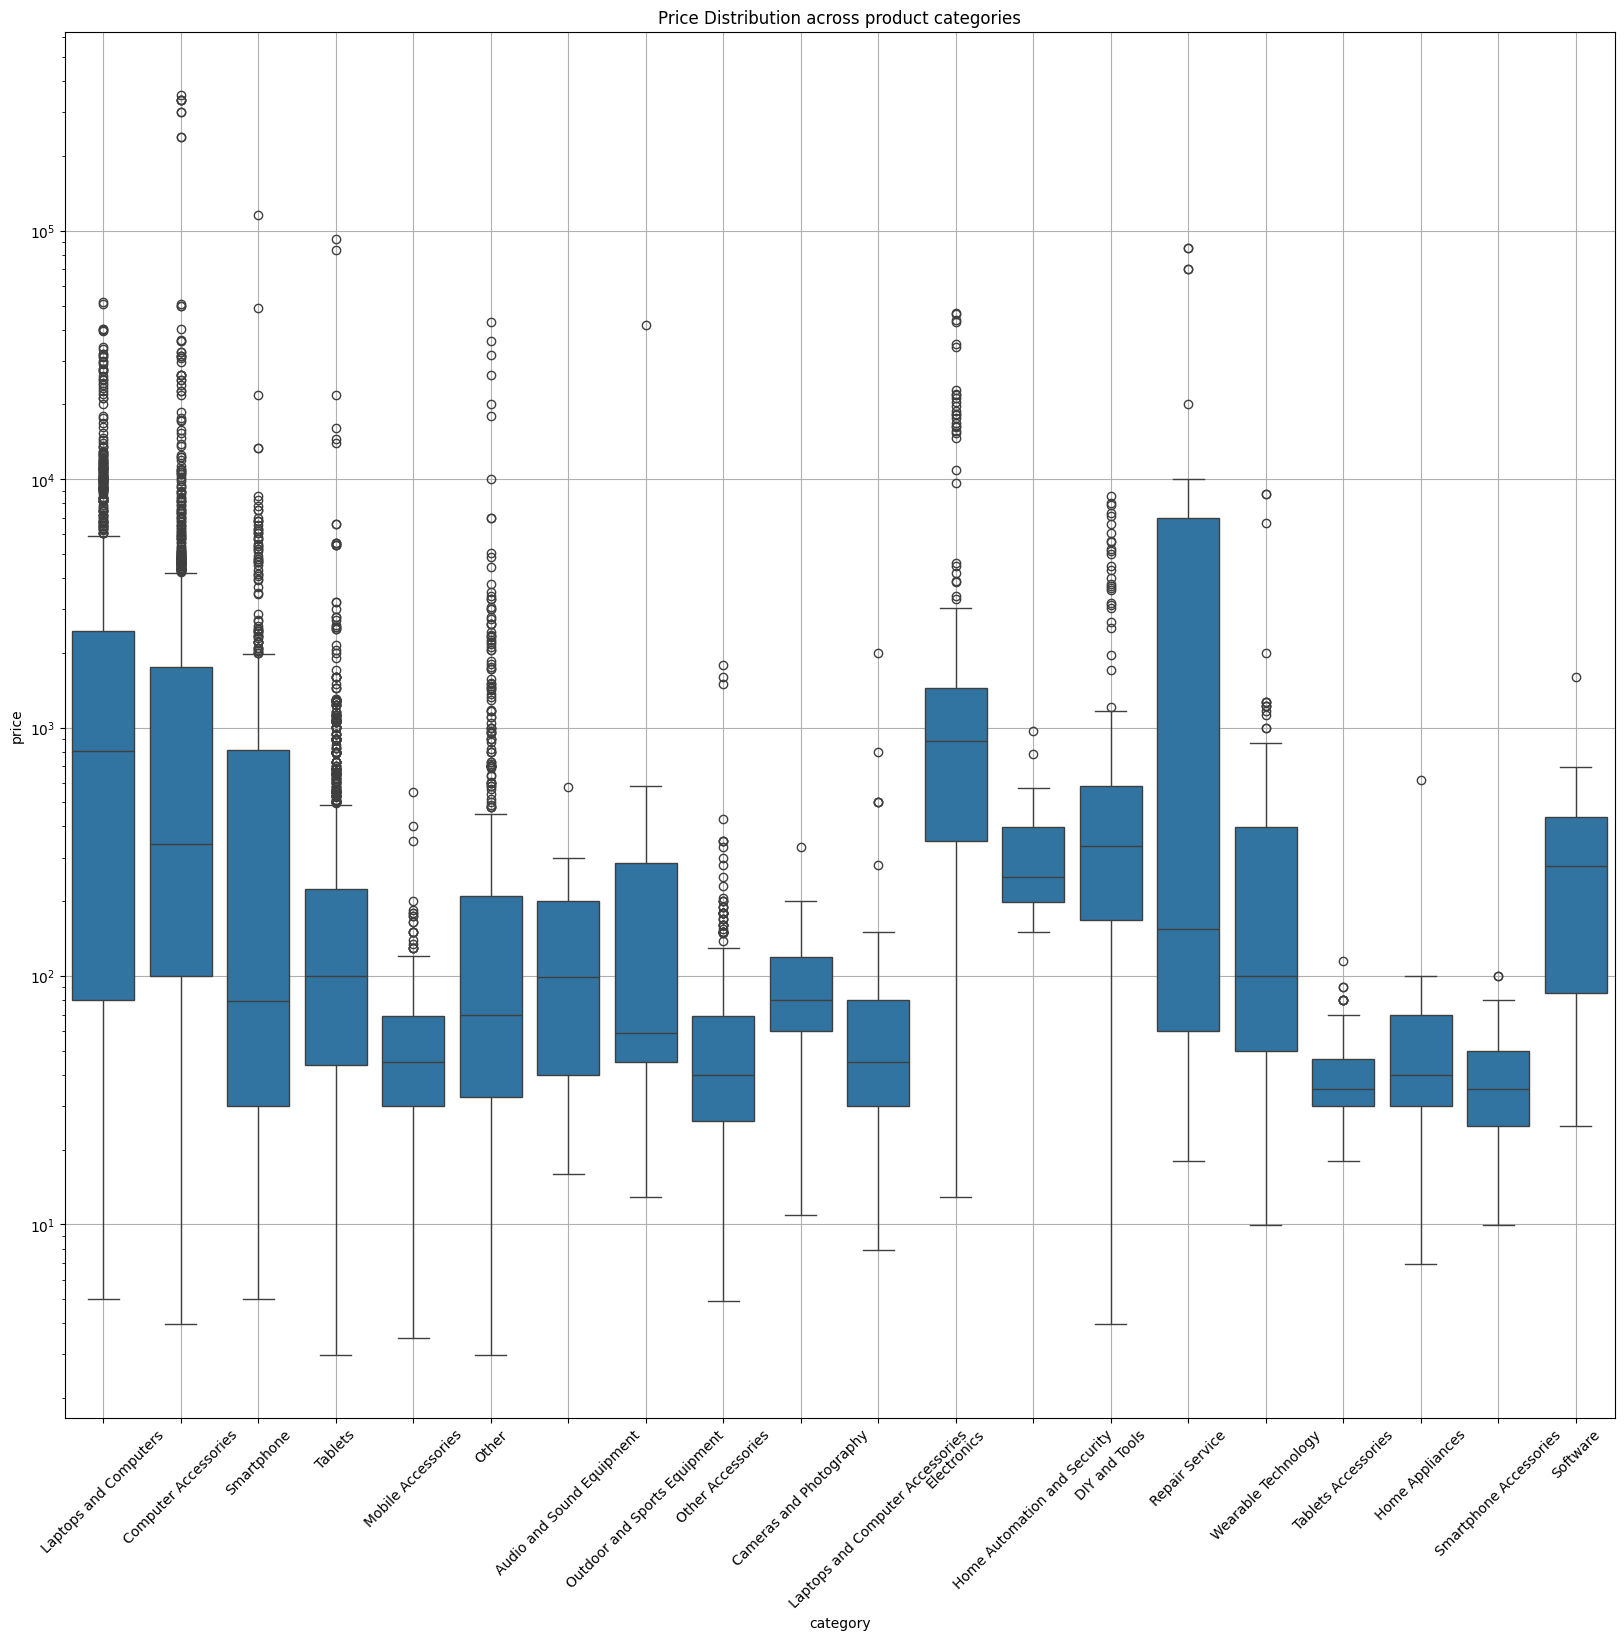

In [552]:
plt.figure(figsize=(20,18))
sns.boxplot(data=products_categories, x="category", y="price")
plt.xticks(rotation=45)
plt.title("Price Distribution across product categories")
#plt.xlabel("Price")
#plt.ylabel("Category")
plt.yscale("log")
plt.grid(True)

How many products are being discounted?

In [553]:
products_categories_discounted=products_categories[products_categories["price"] > products_categories["promo_price"]]

In [554]:
percentage_discount=products_categories_discounted.copy()

How big are the offered discounts as a percentage of the product prices?

In [556]:
percentage_discount["discount percentage %"]= ""

In [558]:
percentage_discount["discount percentage %"]=((percentage_discount["price"] - percentage_discount["promo_price"])/percentage_discount["price"])* 100

In [559]:
percentage_discount

,Unnamed: 0,sku,name,desc,price,promo_price,in_stock,type,category,short,discount percentage %
0,0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,49.99,1,8696,Laptops and Computers,RAI,16.67
1,1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,59.00,0,13855401,Computer Accessories,APP,0.00
2,2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,0,1387,Computer Accessories,APP,3.41
3,3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.00,0,1230,Computer Accessories,APP,8.00
4,4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,0.32,1,1364,Laptops and Computers,KIN,99.09
...,...,...,...,...,...,...,...,...,...,...,...
10575,19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,26.99,1,12282,Wearable Technology,BEL,10.00
10576,19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392,Mobile Accessories,THU,7.09
10577,19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392,Mobile Accessories,THU,7.09
10578,19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,64.99,0,1392,Mobile Accessories,THU,7.09


In [572]:
chart=percentage_discount.groupby("category")["discount percentage %"].mean()

calculate the avg discount in every category.

In [574]:
chart

category
Audio and Sound Equipment          35.43
Cameras and Photography            23.08
Computer Accessories               30.69
DIY and Tools                      36.50
Electronics                        30.46
Home Appliances                    33.49
Home Automation and Security       38.87
Laptops and Computer Accessories   37.96
Laptops and Computers              28.55
Mobile Accessories                 36.24
Other                              33.33
Other Accessories                  36.62
Outdoor and Sports Equipment       31.78
Repair Service                     54.34
Smartphone                         34.46
Smartphone Accessories             39.80
Software                           27.71
Tablets                            34.53
Tablets Accessories                30.51
Wearable Technology                35.37
Name: discount percentage %, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Audio and Sound Equipment'),
  Text(1, 0, 'Cameras and Photography'),
  Text(2, 0, 'Computer Accessories'),
  Text(3, 0, 'DIY and Tools'),
  Text(4, 0, 'Electronics'),
  Text(5, 0, 'Home Appliances'),
  Text(6, 0, 'Home Automation and Security'),
  Text(7, 0, 'Laptops and Computer Accessories'),
  Text(8, 0, 'Laptops and Computers'),
  Text(9, 0, 'Mobile Accessories'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Other Accessories'),
  Text(12, 0, 'Outdoor and Sports Equipment'),
  Text(13, 0, 'Repair Service'),
  Text(14, 0, 'Smartphone'),
  Text(15, 0, 'Smartphone Accessories'),
  Text(16, 0, 'Software'),
  Text(17, 0, 'Tablets'),
  Text(18, 0, 'Tablets Accessories'),
  Text(19, 0, 'Wearable Technology')])

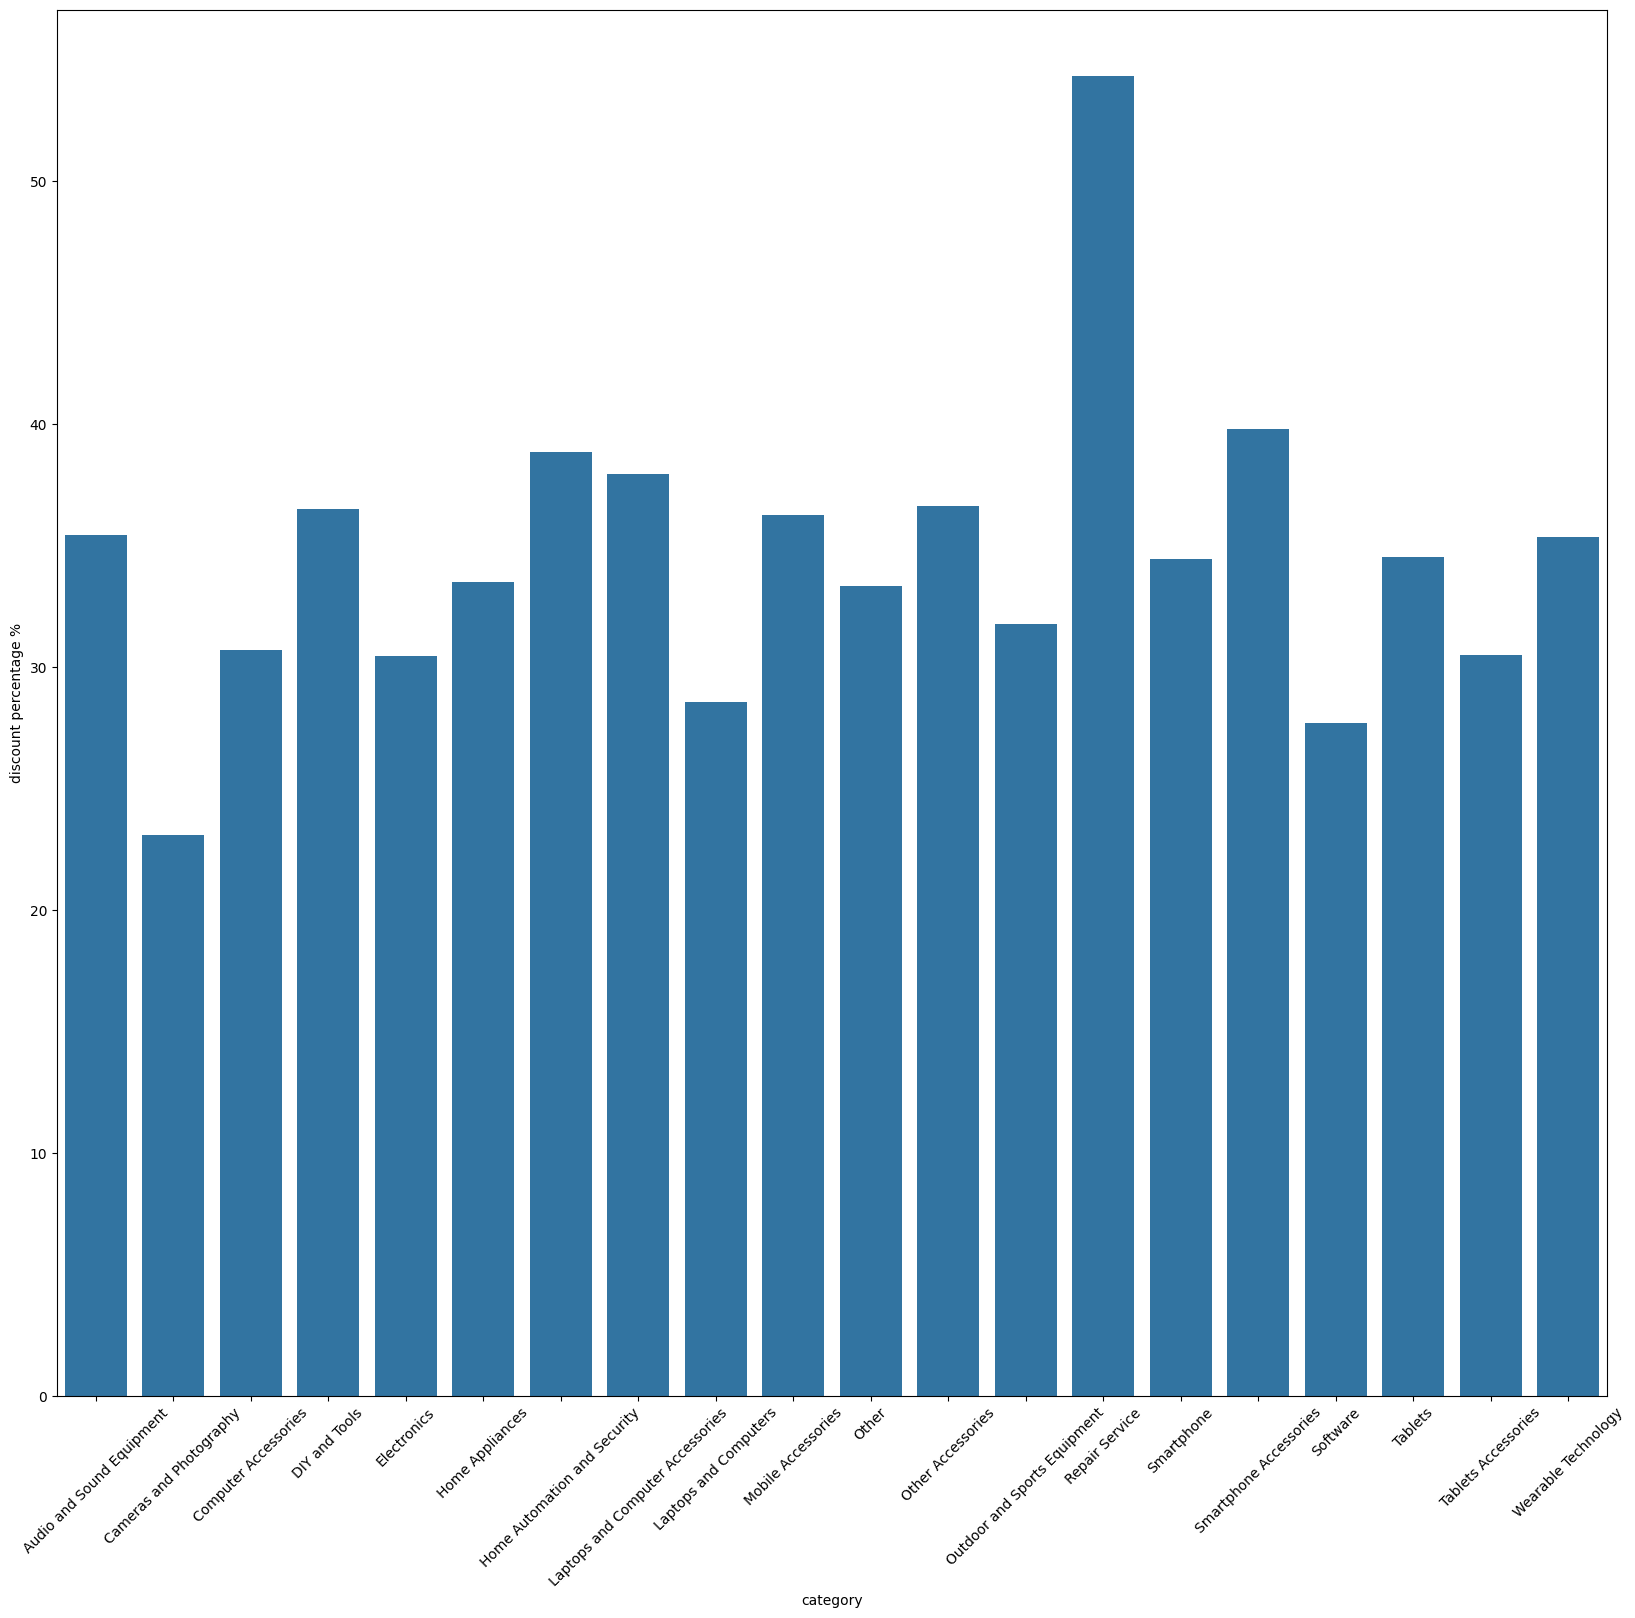

In [577]:
plt.figure(figsize=(20,18))
sns.barplot(data=chart)
plt.xticks(rotation=45)